In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from spectrum import *

In [8]:
tList, nList = np.loadtxt("../../Data/v_ext3hz/InAlpha10/alpha02/raster1.00_1.00filtered_E.dat", unpack=True)
t_d = np.linspace(40000, 50000, 5001)

kde = KernelDensity(bandwidth=1.0, kernel='gaussian') 
kde.fit(tList[:, None]) 
logprob = kde.score_samples(t_d[:, None])

spkDist = np.exp(logprob)
popRate = spkDist*len(tList)/4096 
popRate2 = popRate

corr = np.zeros(1000) 
corr[0] = 1

for i in range(999):
    popRate2 = np.delete(popRate2, 0)
    corr[i+1] = np.corrcoef(popRate[:-(i+1)], popRate2)[0,1]




<IPython.core.display.Javascript object>


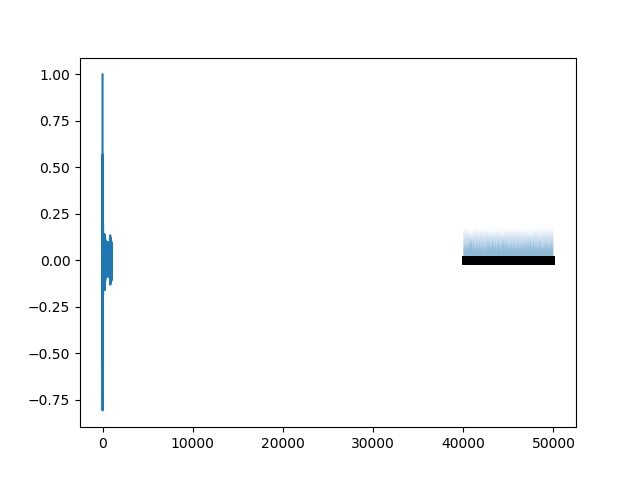

0.7999811919769166


In [9]:
%matplotlib notebook
plt.fill_between(t_d, spkDist*len(tList)/4096, alpha=0.5)  
plt.plot(tList, np.full_like(tList, -0.0001), '|k', markeredgewidth=1)  
plt.show() 

print(4*np.std(spkDist[2500:-100])/max(spkDist))


<IPython.core.display.Javascript object>


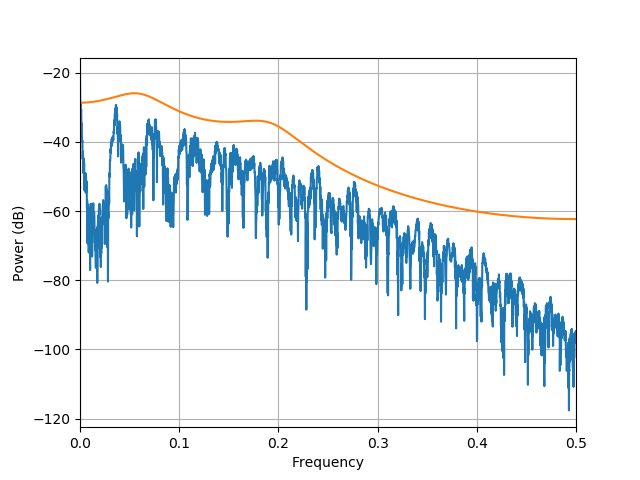

In [41]:
p = Periodogram(popRate)
p()
p.plot()
q = pyule(popRate, 4, sampling=1, scale_by_freq=False)
q.plot()

<IPython.core.display.Javascript object>


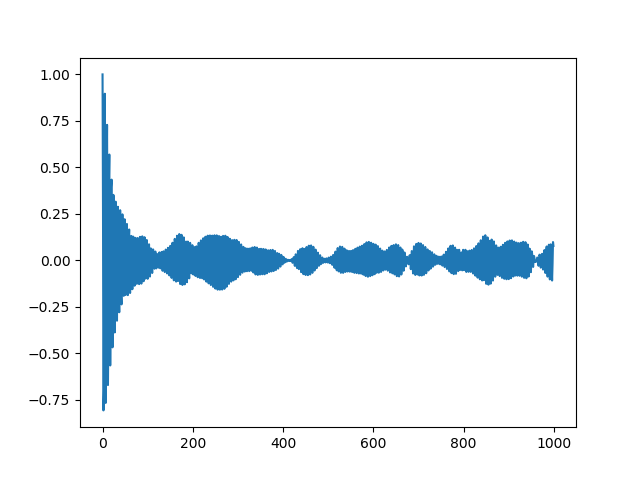

0.43427851729235223


In [11]:
plt.plot(range(0, 1000, 1), corr)
print(max(corr[20:]))